### Libraries

In [35]:
!pip install lime

In [36]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LeakyReLU
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import SGD
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score
import seaborn as sns
import numpy as np
from lime import lime_tabular
import shap

### Reading & preprocessing data

In [37]:
df = pd.read_csv("/kaggle/input/lendingclubcleaned/df_cleaned.csv")
df.head()

,last_pymnt_d,total_rec_prncp,last_pymnt_amnt,out_prncp,total_rec_late_fee,last_fico_range_high,installment,loan_amnt,total_rec_int,out_prncp_inv,...,funded_amnt_inv,recoveries,debt_settlement_flag,hardship_flag,mo_sin_old_rev_tl_op,revol_util,dti,all_util,annual_inc,loan_status
0,17,-0.332581,-0.372797,0.420080,-0.261895,0.281611,-0.473027,-0.461473,0.413942,0.420298,...,-0.461004,-0.445598,0,0,-0.307356,0.608376,0.558953,0.915820,-1.203816,0
1,31,-0.840560,-0.473603,-0.629220,-0.261895,1.244049,-1.608631,-1.601510,-1.081823,-0.629167,...,-1.601271,-0.445598,0,0,-0.187187,-1.880835,-1.233491,-0.049124,0.274631,1
2,27,-0.250720,-0.222228,2.263937,-0.261895,0.883135,1.252073,1.058575,-0.380182,2.264445,...,1.059353,-0.445598,0,0,-0.980297,0.431193,-0.223328,0.379740,2.227297,1
3,39,-0.458023,0.161605,-0.629220,-0.261895,0.161306,-1.364264,-1.373503,-0.909433,-0.629167,...,-1.373218,-0.445598,0,0,-1.472987,0.314511,-0.337836,0.433348,-1.231711,1
4,5,-0.415519,0.220569,-0.629220,-0.261895,0.221459,-1.317547,-1.348168,-0.834440,-0.629167,...,-1.347878,-0.445598,0,0,0.738107,1.273894,0.117928,1.559116,-0.841178,1


In [38]:
X = df.drop(["loan_status"], axis = 1)
y = df["loan_status"]

X

,last_pymnt_d,total_rec_prncp,last_pymnt_amnt,out_prncp,total_rec_late_fee,last_fico_range_high,installment,loan_amnt,total_rec_int,out_prncp_inv,total_pymnt,funded_amnt_inv,recoveries,debt_settlement_flag,hardship_flag,mo_sin_old_rev_tl_op,revol_util,dti,all_util,annual_inc
0,17,-0.332581,-0.372797,0.420080,-0.261895,0.281611,-0.473027,-0.461473,0.413942,0.420298,-0.222676,-0.461004,-0.445598,0,0,-0.307356,0.608376,0.558953,0.915820,-1.203816
1,31,-0.840560,-0.473603,-0.629220,-0.261895,1.244049,-1.608631,-1.601510,-1.081823,-0.629167,-1.102958,-1.601271,-0.445598,0,0,-0.187187,-1.880835,-1.233491,-0.049124,0.274631
2,27,-0.250720,-0.222228,2.263937,-0.261895,0.883135,1.252073,1.058575,-0.380182,2.264445,-0.393139,1.059353,-0.445598,0,0,-0.980297,0.431193,-0.223328,0.379740,2.227297
3,39,-0.458023,0.161605,-0.629220,-0.261895,0.161306,-1.364264,-1.373503,-0.909433,-0.629167,-0.727889,-1.373218,-0.445598,0,0,-1.472987,0.314511,-0.337836,0.433348,-1.231711
4,5,-0.415519,0.220569,-0.629220,-0.261895,0.221459,-1.317547,-1.348168,-0.834440,-0.629167,-0.669368,-1.347878,-0.445598,0,0,0.738107,1.273894,0.117928,1.559116,-0.841178
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119281,36,1.072123,0.066746,-0.629220,-0.261895,0.822982,-0.473196,-0.461473,-0.593052,-0.629167,0.659788,-0.461004,-0.445598,0,0,0.353569,0.720736,-0.931916,0.111700,4.179963
119282,26,0.475587,-0.417190,-0.629220,-0.261895,-1.462808,1.079697,0.555059,1.491599,-0.629167,0.784970,0.555735,-0.445598,0,0,-0.727944,0.405263,-0.997673,2.309628,1.390440
119283,27,-0.983894,-0.414521,0.132695,-0.261895,1.003439,-0.951061,-1.078993,-0.949884,0.132868,-1.184196,-1.078649,-0.445598,0,0,2.336344,-0.109001,0.109992,-0.746028,-1.426978
119284,13,0.639197,-0.321768,-0.629220,3.433568,-0.981589,0.636417,1.311917,2.824325,-0.629167,1.330306,1.312745,-0.445598,1,0,-0.259288,-0.484975,-0.158705,-0.049124,0.001258


In [39]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=737)

### 2 Layer Neural Network Model

In [40]:
def neural_network_model(x_train, y_train, input=20, print=1):
  nn = Sequential()

  nn.add(Dense(512, input_shape=(input, ), kernel_regularizer=regularizers.l2(0.2)))
  nn.add(LeakyReLU(alpha=0.01))
  nn.add(Dropout(0.5))

  nn.add(Dense(512, kernel_regularizer=regularizers.l2(0.2)))
  nn.add(LeakyReLU(alpha=0.01))
  nn.add(Dropout(0.5))

  nn.add(Dense(1, activation='sigmoid'))

  optimizer = SGD(learning_rate=0.01)

  nn.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

  nn.fit(x_train, y_train, batch_size=64, epochs=20, validation_split=0.2, verbose=print)

  return nn

In [41]:
nn = neural_network_model(x_train, y_train)

Epoch 1/20


Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
Argument `alpha` is deprecated. Use `negative_slope` instead.


1193/1193 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7714 - loss: 33.3595 - val_accuracy: 0.8026 - val_loss: 0.5943
Epoch 2/20
1193/1193 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8627 - loss: 0.5605 - val_accuracy: 0.9141 - val_loss: 0.5092
Epoch 3/20
1193/1193 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8472 - loss: 0.5536 - val_accuracy: 0.9380 - val_loss: 0.4778
Epoch 4/20
1193/1193 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8400 - loss: 0.5501 - val_accuracy: 0.9426 - val_loss: 0.4698
Epoch 5/20
1193/1193 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8298 - loss: 0.5624 - val_accuracy: 0.9439 - val_loss: 0.4511
Epoch 6/20
1193/1193 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8266 - loss: 0.5620 - val_accuracy: 0.7219 - val_loss: 0.6070
Epoch 7/20
1193/1193 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8281 - loss: 0.5578 - val_accuracy: 0.9023 - val_loss: 0.4700
Epoch 8/20
1193/1193 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8276 - loss: 0.5599 - val_accura

In [42]:
y_pred_nn = nn.predict(x_test)
y_pred_nn = (y_pred_nn > 0.5).astype(int)

746/746 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


### Performance Measures

In [43]:
accuracy_score(y_test, y_pred_nn)

0.9414871321988432

In [44]:
f1_score(y_test, y_pred_nn)

0.9444267515923568

In [45]:
roc_auc_score(y_test, nn.predict(x_test)[:])

746/746 ━━━━━━━━━━━━━━━━━━━━ 1s 953us/step


0.9845837457389135

### Explainability

#### Global Surrogate

In [46]:
s_x = x_test
s_y = y_pred_nn

surrogate = LogisticRegression(random_state=0).fit(s_x, s_y)
y_pred = surrogate.predict(s_x)
r2_score(y_pred_nn, y_pred)

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


0.9971371195880755

R-sqaured value of 0.986, surrogate is a good estimate of neural network.

In [47]:
x_test.columns

Index(['last_pymnt_d', 'total_rec_prncp', 'last_pymnt_amnt', 'out_prncp',
       'total_rec_late_fee', 'last_fico_range_high', 'installment',
       'loan_amnt', 'total_rec_int', 'out_prncp_inv', 'total_pymnt',
       'funded_amnt_inv', 'recoveries', 'debt_settlement_flag',
       'hardship_flag', 'mo_sin_old_rev_tl_op', 'revol_util', 'dti',
       'all_util', 'annual_inc'],
      dtype='object')

In [48]:
surrogate.coef_

array([[ 0.55063111,  4.28930759,  3.92037067,  4.44126999, -2.86470008,
        12.01821126, -2.58387361, -2.709672  , -1.60532371,  4.43810004,
         2.5138251 , -2.73335703, -4.16626549, -1.52493339, -0.23827785,
        -0.30155744,  0.0619172 , -1.27416459, -0.6912026 ,  0.04835295]])

The most influential features by weight are:
1. last_fico_range_high -12.2
2. out_prncp -4.73
3. out_prncp_inv -4.72

#### LOFO

In [49]:
accuracies = []
f1_scores = []
roc_aucs = []
cols = x_train.columns.tolist()
for col in cols:
  xtrain = x_train.drop(col, axis=1)
  xtest = x_test.drop(col, axis=1)

  nn = neural_network_model(xtrain, y_train, 19, 0)
  y_pred = nn.predict(xtest)
  y_pred_nn = (y_pred > 0.5).astype(int)
  accuracies.append(accuracy_score(y_test, y_pred_nn))
  f1_scores.append(f1_score(y_test, y_pred_nn))
  roc_aucs.append(roc_auc_score(y_test, y_pred))


nn = neural_network_model(x_train, y_train)
y_pred = nn.predict(x_test)
y_pred_nn = (y_pred > 0.5).astype(int)
accuracies.append(accuracy_score(y_test, y_pred_nn))
f1_scores.append(f1_score(y_test, y_pred_nn))
roc_aucs.append(roc_auc_score(y_test, y_pred))
cols.append("None")

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
Argument `alpha` is deprecated. Use `negative_slope` instead.


746/746 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
Argument `alpha` is deprecated. Use `negative_slope` instead.


746/746 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
Argument `alpha` is deprecated. Use `negative_slope` instead.


746/746 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
Argument `alpha` is deprecated. Use `negative_slope` instead.


746/746 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
Argument `alpha` is deprecated. Use `negative_slope` instead.


746/746 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
Argument `alpha` is deprecated. Use `negative_slope` instead.


746/746 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
Argument `alpha` is deprecated. Use `negative_slope` instead.


746/746 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
Argument `alpha` is deprecated. Use `negative_slope` instead.


746/746 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
Argument `alpha` is deprecated. Use `negative_slope` instead.


746/746 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
Argument `alpha` is deprecated. Use `negative_slope` instead.


746/746 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
Argument `alpha` is deprecated. Use `negative_slope` instead.


746/746 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
Argument `alpha` is deprecated. Use `negative_slope` instead.


746/746 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
Argument `alpha` is deprecated. Use `negative_slope` instead.


746/746 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
Argument `alpha` is deprecated. Use `negative_slope` instead.


746/746 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
Argument `alpha` is deprecated. Use `negative_slope` instead.


746/746 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
Argument `alpha` is deprecated. Use `negative_slope` instead.


746/746 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
Argument `alpha` is deprecated. Use `negative_slope` instead.


746/746 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
Argument `alpha` is deprecated. Use `negative_slope` instead.


746/746 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
Argument `alpha` is deprecated. Use `negative_slope` instead.


746/746 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
Argument `alpha` is deprecated. Use `negative_slope` instead.


746/746 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Epoch 1/20


Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
Argument `alpha` is deprecated. Use `negative_slope` instead.


1193/1193 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7775 - loss: 33.2180 - val_accuracy: 0.9414 - val_loss: 0.5324
Epoch 2/20
1193/1193 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8592 - loss: 0.5630 - val_accuracy: 0.9414 - val_loss: 0.4780
Epoch 3/20
1193/1193 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8458 - loss: 0.5554 - val_accuracy: 0.5950 - val_loss: 0.7497
Epoch 4/20
1193/1193 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8409 - loss: 0.5527 - val_accuracy: 0.7162 - val_loss: 0.6168
Epoch 5/20
1193/1193 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8250 - loss: 0.5668 - val_accuracy: 0.7891 - val_loss: 0.5707
Epoch 6/20
1193/1193 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8291 - loss: 0.5550 - val_accuracy: 0.9438 - val_loss: 0.4385
Epoch 7/20
1193/1193 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8276 - loss: 0.5585 - val_accuracy: 0.9437 - val_loss: 0.4488
Epoch 8/20
1193/1193 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8263 - loss: 0.5581 - val_accura

unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.


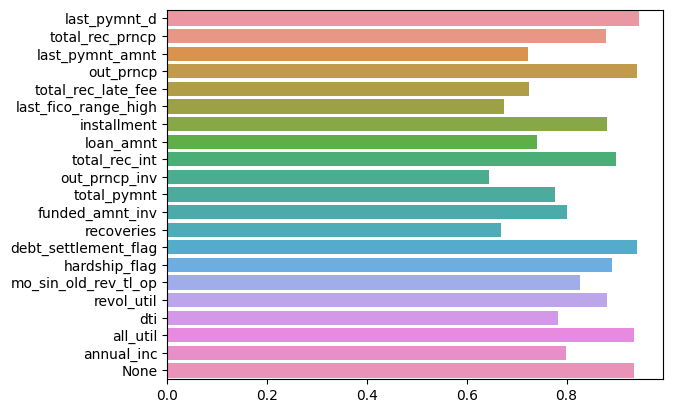

In [50]:
sns.barplot(y=cols, x=accuracies)
plt.show()

 Each of the following columns decrease accuracy greatly when removed.

  'out_prncp', 'total_rec_late_fee', 'last_fico_range_high', 'installment', 'loan_amnt', 'total_rec_int', 'total_pymnt', 'funded_amnt_inv', 'recoveries', 'dti', 'all_util', 'annual_inc'

 All other columns have little or no effect on the accuracy.

unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.


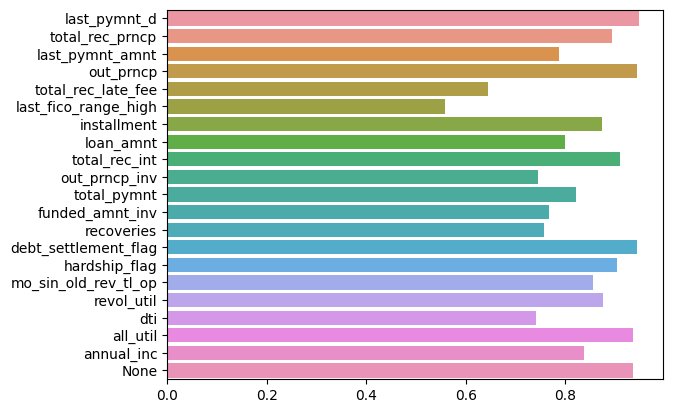

In [51]:
sns.barplot(y=cols, x=f1_scores)
plt.show()

 Each of the following columns decrease f1-score greatly when removed.

  'out_prncp', 'total_rec_late_fee', 'last_fico_range_high', 'installment', 'loan_amnt', 'total_rec_int', 'total_pymnt', 'funded_amnt_inv', 'recoveries', 'dti', 'all_util', 'annual_inc'

 All other columns have little or no effect on f1-score.

unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.


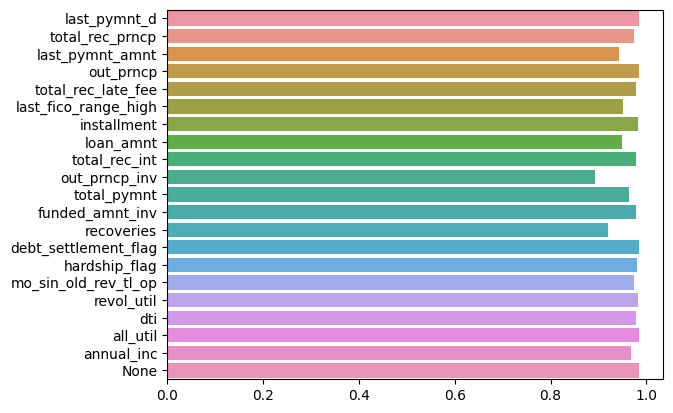

In [52]:
sns.barplot(y=cols, x=roc_aucs)
plt.show()

 Each of the following columns decrease roc-auc score greatly when removed.

'last_fico_range_high', 'loan_amnt', 'total_rec_int', 'all_util'

 All other columns have little or no effect on roc-auc score.

#### LIME

In [53]:
x_test.reset_index(inplace=True)
x_test.drop("index", axis=1, inplace=True)
# x_test.drop("level_0", axis=1, inplace=True)
# x_test.head()
x_test.shape

(23858, 20)

In [54]:
instance = x_test.iloc[0]

explainer = lime_tabular.LimeTabularExplainer(training_data=np.array(x_train),
                                              mode='classification',
                                              feature_names=x_train.columns.tolist())

def predfunc(x):
    proba = nn.predict(x)
    return np.hstack([1 - proba, proba])

values = explainer.explain_instance(instance, predfunc, num_samples=1000,
                                              num_features=x_train.shape[1])
values.as_list()

 1/32 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`


[('last_fico_range_high > 0.82', 0.27924230213994355),
 ('recoveries <= -0.45', 0.13759119753560975),
 ('out_prncp_inv > 0.42', 0.13331761656582578),
 ('total_rec_prncp > 0.38', 0.12636248944820205),
 ('total_rec_late_fee <= -0.26', 0.10640633522887513),
 ('out_prncp > 0.42', 0.0936503345576799),
 ('installment > 0.53', -0.0749415820840014),
 ('loan_amnt > 0.65', -0.06984901033252706),
 ('total_pymnt > 0.49', 0.06658536946621342),
 ('funded_amnt_inv > 0.65', -0.05414154749366215),
 ('debt_settlement_flag <= 0.00', 0.041598227931796246),
 ('total_rec_int > 0.40', -0.0379611624651746),
 ('-0.07 < dti <= 0.69', -0.01595204012911312),
 ('hardship_flag <= 0.00', 0.014508891239354125),
 ('16.00 < last_pymnt_d <= 27.00', 0.013838599371152836),
 ('0.06 < all_util <= 0.70', -0.011447770419641087),
 ('-0.70 < mo_sin_old_rev_tl_op <= -0.15', -0.010774912127463962),
 ('annual_inc > 0.41', 0.00948856942580069),
 ('revol_util > 0.73', 0.006946968304484215),
 ('-0.33 < last_pymnt_amnt <= -0.22', -0.0

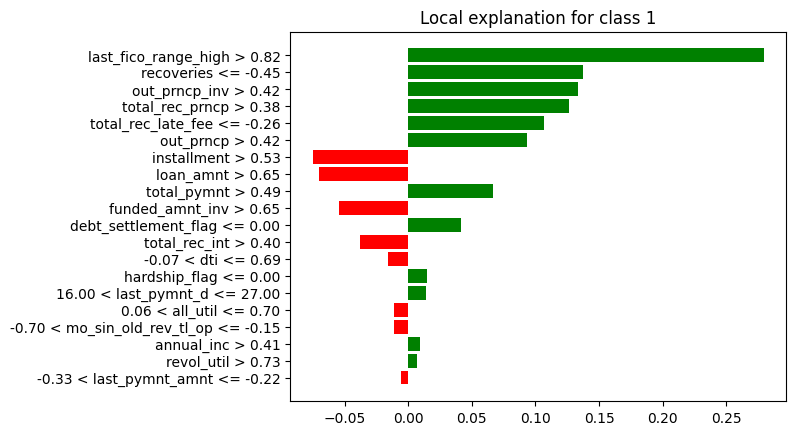

In [55]:
values.as_pyplot_figure();

last_fico_range_high affects the point the most positively.

installment affects the point the most negatively.

last_pymnt_amnt has the least effect on the point.

There's a higher positive effect from features than negative.

In [56]:
instance = x_test.iloc[500]

explainer = lime_tabular.LimeTabularExplainer(training_data=np.array(x_train),
                                              mode='classification',
                                              feature_names=x_train.columns.tolist())

def predfunc(x):
    proba = nn.predict(x)
    return np.hstack([1 - proba, proba])

values = explainer.explain_instance(instance, predfunc, num_samples=1000,
                                              num_features=x_train.shape[1])
values.as_list()

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels

[('total_rec_late_fee <= -0.26', 0.13782825757599773),
 ('-0.92 < last_fico_range_high <= 0.10', -0.1107441053024795),
 ('recoveries <= -0.45', 0.09000025760265948),
 ('out_prncp_inv <= -0.63', -0.07604287096050168),
 ('-0.71 < funded_amnt_inv <= -0.21', 0.05684355403530216),
 ('out_prncp <= -0.63', -0.056594272937168656),
 ('-0.72 < total_rec_prncp <= -0.34', -0.0521661826386105),
 ('all_util <= -0.64', 0.0431457180683654),
 ('last_pymnt_d > 27.00', 0.033766523840229906),
 ('-0.75 < total_pymnt <= -0.27', -0.0335318623373056),
 ('-0.72 < total_rec_int <= -0.33', 0.025655871132985338),
 ('-0.39 < last_pymnt_amnt <= -0.33', -0.020346429814426838),
 ('-0.15 < mo_sin_old_rev_tl_op <= 0.53', -0.008434304777090345),
 ('-0.70 < installment <= -0.23', 0.008209672374231194),
 ('debt_settlement_flag <= 0.00', 0.007475273893463645),
 ('revol_util <= -0.75', 0.0066875100930834895),
 ('-0.71 < loan_amnt <= -0.21', -0.005477270406611032),
 ('-0.07 < dti <= 0.69', -0.0041238795335132505),
 ('hardshi

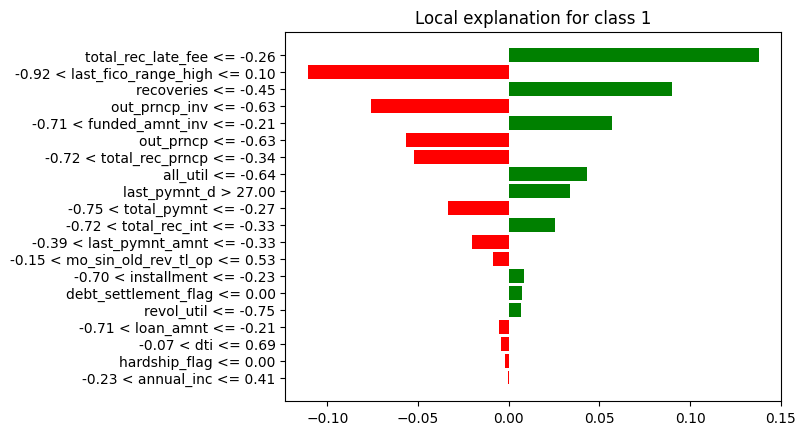

In [57]:
values.as_pyplot_figure();

total_rec_late_fee affects the point the most positively.

last_fico_range_high affects the point the most negatively.

annual_inc has the least effect on the point.

#### SHAP

In [ ]:
background = x_train.iloc[np.random.choice(x_train.shape[0], 1000, replace=False)]
test_images = x_train.iloc[np.random.choice(x_test.shape[0], 1000, replace=False)]

import shap

# SHAP needs a prediction function that returns probabilities
f = lambda x: nn.predict(x)

# Use a small sample for background (speed)
explainer = shap.KernelExplainer(f, background)

# Get SHAP values for test data
shap_values = explainer.shap_values(test_images, nsamples=100)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 994us/step


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 3s 951us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 3s 986us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 3s 983us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 3s 985us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 3s 985us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 3s 993us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 3s 986us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 3s 987us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 3s 982us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 3s 986us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 3s 988us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 3s 987us/step
1/1

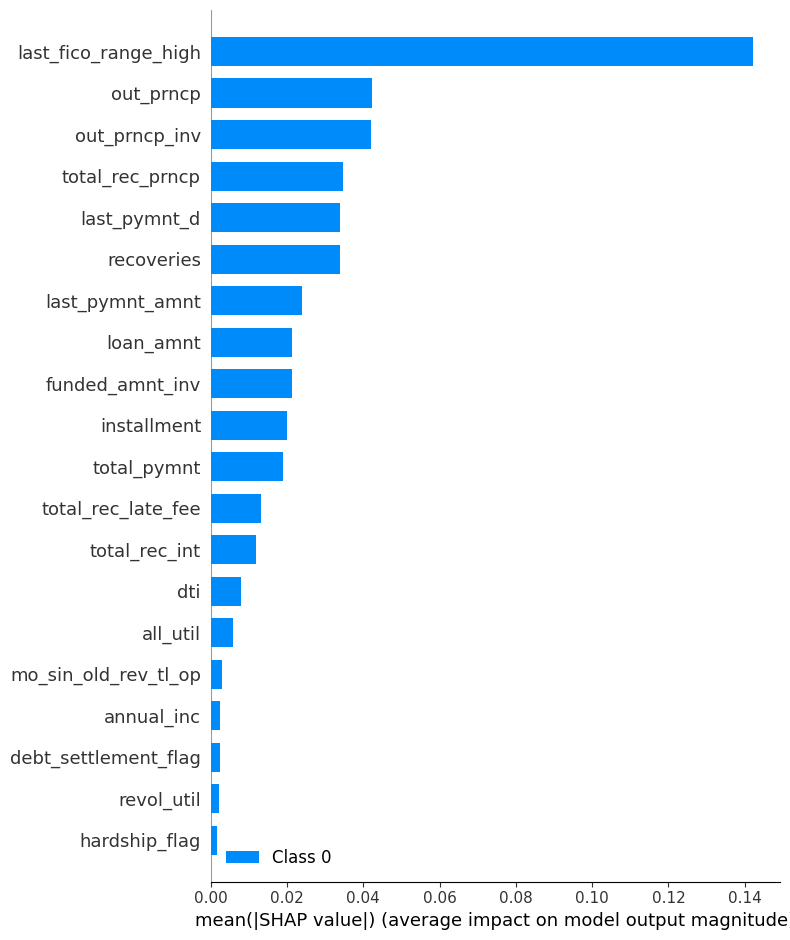

In [60]:
shap.summary_plot(shap_values, test_images, plot_type="bar")

(Actually Class 1)

last_fico_range_high is the most influential feature on the model.

With out_prncp & out_prncp_inv being distant second & third, respectively.